### Assignment on Model Selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset

titanic_data = pd.read_csv("titanic_dataset.csv", index_col = 0)

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 11)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking Null values

titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Handling missing values 

In [8]:
#Age column

titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)

In [9]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Cabin column

# Since most of the datapoints in the column is null value, it is better to drop the column
titanic_data.drop(columns="Cabin", inplace = True)

In [11]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [12]:
# Embarked column 

titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

In [13]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Outlier analysis

In [15]:
titanic = titanic_data.copy()

<Axes: xlabel='Age'>

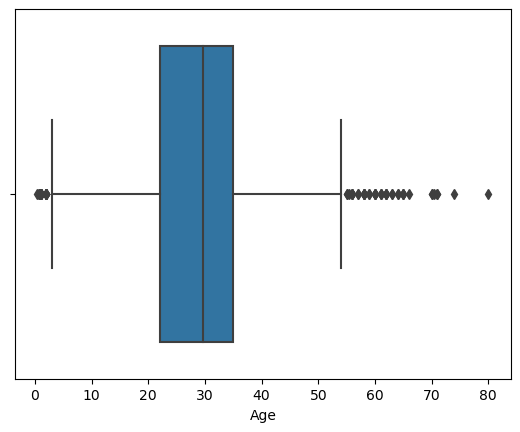

In [16]:
#age column

sns.boxplot(x = titanic["Age"])

In [17]:
# z_score

data_age = titanic["Age"]

z_score = (data_age - data_age.mean()) / data_age.std()

In [18]:
z_score.mean()

2.153159805333637e-16

In [19]:
thresh = 2

outlier_age = abs(z_score) > thresh

In [20]:
titanic[outlier_age]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C
...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [21]:
# removing outlier from age column

titanic_noage_outlier = titanic[~outlier_age]
titanic_noage_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


<Axes: xlabel='Fare'>

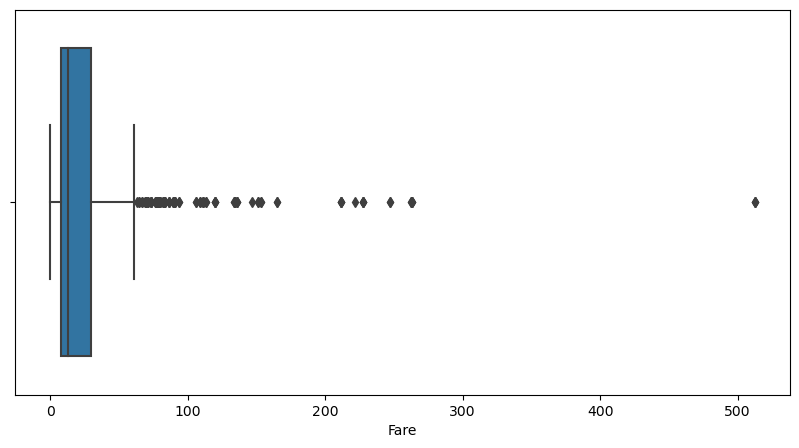

In [22]:
#Fare column

plt.figure(figsize=(10,5))
sns.boxplot(x = titanic_noage_outlier["Fare"])

In [23]:
#IQR for Fare column

data_fare = titanic_noage_outlier["Fare"]

Q1 = data_fare.quantile(0.25)
Q3 = data_fare.quantile(0.75)
IQR = Q3 - Q1

IQR

22.1573

In [24]:
thresh1 = 1.5

outlier_fare = (data_fare < Q1 - thresh1 * IQR) | (data_fare > Q3 + thresh1 * IQR)

titanic_noage_outlier[outlier_fare]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
836,1,1,"Compton, Miss. Sara Rebecca",female,39.000000,1,1,PC 17756,83.1583,C
847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C


In [25]:
# removing outlier from fare column

titanic_no_outlier = titanic_noage_outlier[~outlier_fare]

titanic_no_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [26]:
# dropping Name and Ticket column from the dataset

titanic_encode = titanic_no_outlier.drop(columns=["Name","Ticket"])

titanic_encode

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
6,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


#### Preprocessing

* Encoding

In [27]:
# Label encoding for sex column

from sklearn.preprocessing import LabelEncoder

encode_column = titanic_encode["Sex"]

encode = LabelEncoder()

encoded_col = encode.fit_transform(encode_column)


In [28]:
#adding encoded value to original column

titanic_encode["Sex"] = encoded_col

In [29]:
titanic_encode

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,S
3,1,3,0,26.000000,0,0,7.9250,S
4,1,1,0,35.000000,1,0,53.1000,S
5,0,3,1,35.000000,0,0,8.0500,S
6,0,3,1,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,S
888,1,1,0,19.000000,0,0,30.0000,S
889,0,3,0,29.699118,1,2,23.4500,S


In [30]:
# encoding Embarked column using one-hot encoding

encode_embarke = pd.get_dummies(titanic_encode["Embarked"])

In [31]:
encode_embarke.set_index(titanic_encode.index)

,C,Q,S
PassengerId,,,
1,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [32]:
#Joining encoded embarked column to the dataset

titanic_encodedvalues = pd.concat([titanic_encode, encode_embarke], axis=1)

In [33]:
titanic_encodedvalues

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,S,0,0,1
3,1,3,0,26.000000,0,0,7.9250,S,0,0,1
4,1,1,0,35.000000,1,0,53.1000,S,0,0,1
5,0,3,1,35.000000,0,0,8.0500,S,0,0,1
6,0,3,1,29.699118,0,0,8.4583,Q,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,S,0,0,1
888,1,1,0,19.000000,0,0,30.0000,S,0,0,1
889,0,3,0,29.699118,1,2,23.4500,S,0,0,1


In [34]:
#Renaming Columns

titanic_encodedvalues.rename({"C" : "Embarked C", "Q": "Embarked Q", "S": "Embarked S"}, inplace=True, axis=1)

In [35]:
titanic_encodedvalues

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked C,Embarked Q,Embarked S
PassengerId,,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,S,0,0,1
3,1,3,0,26.000000,0,0,7.9250,S,0,0,1
4,1,1,0,35.000000,1,0,53.1000,S,0,0,1
5,0,3,1,35.000000,0,0,8.0500,S,0,0,1
6,0,3,1,29.699118,0,0,8.4583,Q,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,S,0,0,1
888,1,1,0,19.000000,0,0,30.0000,S,0,0,1
889,0,3,0,29.699118,1,2,23.4500,S,0,0,1


* Scaling 

In [36]:
#droping embarked column

titanic_encodedvalues.drop(columns="Embarked", inplace=True)


#Feature and Target varible

x = titanic_encodedvalues.drop(columns="Survived")
y = titanic_encodedvalues["Survived"]

In [37]:
#Scaling using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [38]:
#Splititing into train and test data

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(572, 9) (143, 9) (572,) (143,)


#### Model selection

##### KNN classification model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
#Prediction

knn_predict = knn_model.predict(x_test)

In [41]:
#Evaluation

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn_accuracy = accuracy_score(y_test, knn_predict)

print("Accuray Score: ", knn_accuracy)
print("\nClassification Report: \n", classification_report(knn_predict, y_test))

Accuray Score:  0.8181818181818182

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       109
           1       0.60      0.74      0.66        34

    accuracy                           0.82       143
   macro avg       0.75      0.79      0.77       143
weighted avg       0.84      0.82      0.82       143



[[92  9]
 [17 25]]


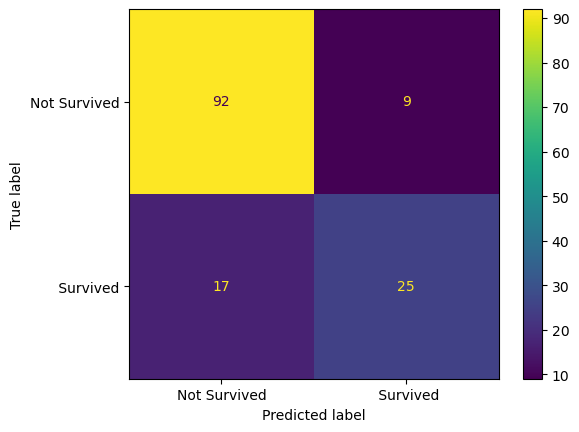

In [42]:
conf_m = confusion_matrix(y_test, knn_predict)

cfd = ConfusionMatrixDisplay(conf_m,display_labels=["Not Survived"," Survived"])
cfd.plot()

print(conf_m)

##### SVM classifaction model


In [43]:

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [44]:
#prediction

svm_pred = svm_model.predict(x_test)

In [45]:
#evalaution

svm_accuracy = accuracy_score(svm_pred, y_test)

print("Accuray Score: ", svm_accuracy)
print("\nClassification Report: \n", classification_report(svm_pred, y_test))

Accuray Score:  0.8321678321678322

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       115
           1       0.55      0.82      0.66        28

    accuracy                           0.83       143
   macro avg       0.75      0.83      0.77       143
weighted avg       0.87      0.83      0.84       143



[[96  5]
 [19 23]]


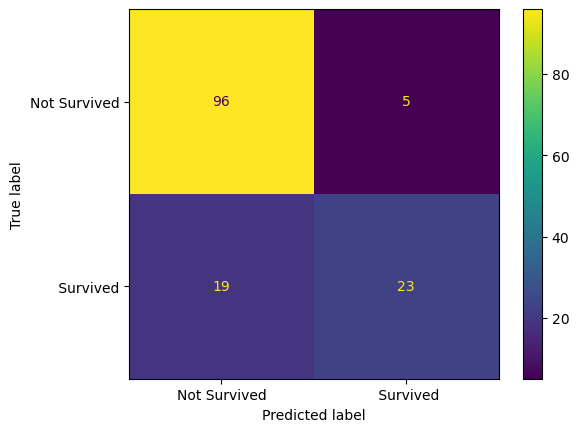

In [46]:
conf_m = confusion_matrix(y_test, svm_pred)

cfd = ConfusionMatrixDisplay(conf_m,display_labels=["Not Survived"," Survived"])
cfd.plot()

print(conf_m)

#### Cross validation

##### K fold Cross validation technique

In [47]:
#Importing and initialising KFold 

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, random_state=42, shuffle=True)



* KNN classifiaction Model

In [48]:
#Calculating cross validation scores

knn_score = cross_val_score(knn_model, x,y, cv=kfold)
knn_score

array([0.81818182, 0.76923077, 0.82517483, 0.76923077, 0.74825175])

In [49]:
# Mean score

knn_score.mean()

0.786013986013986

* SVM Classifaction Model

In [50]:
#Calculating cross validation scores

svm_score = cross_val_score(svm_model,x,y, cv=kfold)
svm_score

array([0.83216783, 0.77622378, 0.85314685, 0.82517483, 0.75524476])

In [51]:
# Average score

svm_score.mean()

0.8083916083916083

###### Stratified K fold Cross validation techique

In [52]:
#Importing and initialising Stratified KFold 

from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

* KNN classifiaction Model

In [53]:
#Calculating cross validation scores

knn_values = cross_val_score(knn_model, x, y, cv=skfold)
knn_values

array([0.77653631, 0.79888268, 0.80446927, 0.78089888])

In [54]:
#Mean Score

knn_values.mean()

0.7901967861402297

* SVM Classifaction Model

In [55]:
#Calculating cross validation scores

svm_values = cross_val_score(svm_model, x, y, cv=skfold)
svm_values

array([0.80446927, 0.81005587, 0.83240223, 0.79775281])

In [56]:
#Mean Score

svm_values.mean()

0.81117004582261

Average accuracy score of the classification models after using:
       
       1.KFold cross validation technique 

            > KNN classification model : 0.78
            > SVM classification model : 0.80
        
       2.Stratified KFold cross validation technique 

            > KNN classification model : 0.79
            > SVM classification model : 0.81
        
